In [1]:
%gui qt

from core.jupyterform import get_form
from core.configuration import Configuration

conf = Configuration()
get_form(conf)

Box(children=(Box(children=(Label(value='Iterations'), interactive(children=(IntSlider(value=100, continuous_u…

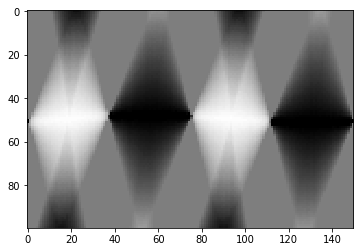

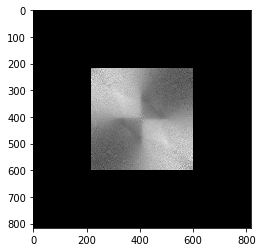

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [5]:
from core.configuration import Configuration
from core.sinogram import Sinogram
from PIL import Image
import pydicom
from core.dicomwrite import wirte_dicom
image = Image.open('images/Kwadraty2.jpg')
conf = Configuration(
    iterations=150,
    quantity_of_detectors=100,
    dispersion=35,
)

sinogram = Sinogram(conf)
for iteration, _ in sinogram.create_sinogram_from_image(image):
    print(iteration)

image2 = sinogram.sinogram_to_image()




In [2]:
from core.form2 import get_form2
get_form2(conf)

TraitError: The 'value' trait of a Text instance must be a unicode string, but a value of <bound method Configuration.set_name of <core.configuration.Configuration object at 0x0000018B7992A828>> <class 'method'> was specified.